<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки.-Считаем-данные-из-csv-файла-в-датафрейм-и-сохраним-в-переменную-data_cow." data-toc-modified-id="Импортируем-библиотеки.-Считаем-данные-из-csv-файла-в-датафрейм-и-сохраним-в-переменную-data_cow.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data_cow.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Обработки-категориальных-признаков" data-toc-modified-id="Обработки-категориальных-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработки категориальных признаков</a></span></li><li><span><a href="#Разобьем-данные-на-выборки" data-toc-modified-id="Разобьем-данные-на-выборки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Разобьем данные на выборки</a></span></li><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Стандартизация данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-модель-для-классификации-деревом-решений" data-toc-modified-id="DecisionTreeClassifier-модель-для-классификации-деревом-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DecisionTreeClassifier модель для классификации деревом решений</a></span></li><li><span><a href="#RandomForestClassifier-модель-для-классификации-алгоритмом-случайного-леса" data-toc-modified-id="RandomForestClassifier-модель-для-классификации-алгоритмом-случайного-леса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier модель для классификации алгоритмом случайного леса</a></span></li><li><span><a href="#Модель-LogisticRegression---логистическая-регрессия" data-toc-modified-id="Модель-LogisticRegression---логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LogisticRegression - логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

###  Импортируем библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную data_cow.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve, 
    accuracy_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve
)
from sklearn.utils import shuffle
from tqdm import tqdm 
from joblib import dump
pd.options.mode.chained_assignment = None

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
try:
    raw_data = pd.read_csv('D:\\Мои документы\\DS\\Churn.csv')
except:
    raw_data = pd.read_csv('/datasets/Churn.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
raw_data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


**Согласно документации в датафрейме содержится следующая информация:**

**Признаки**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

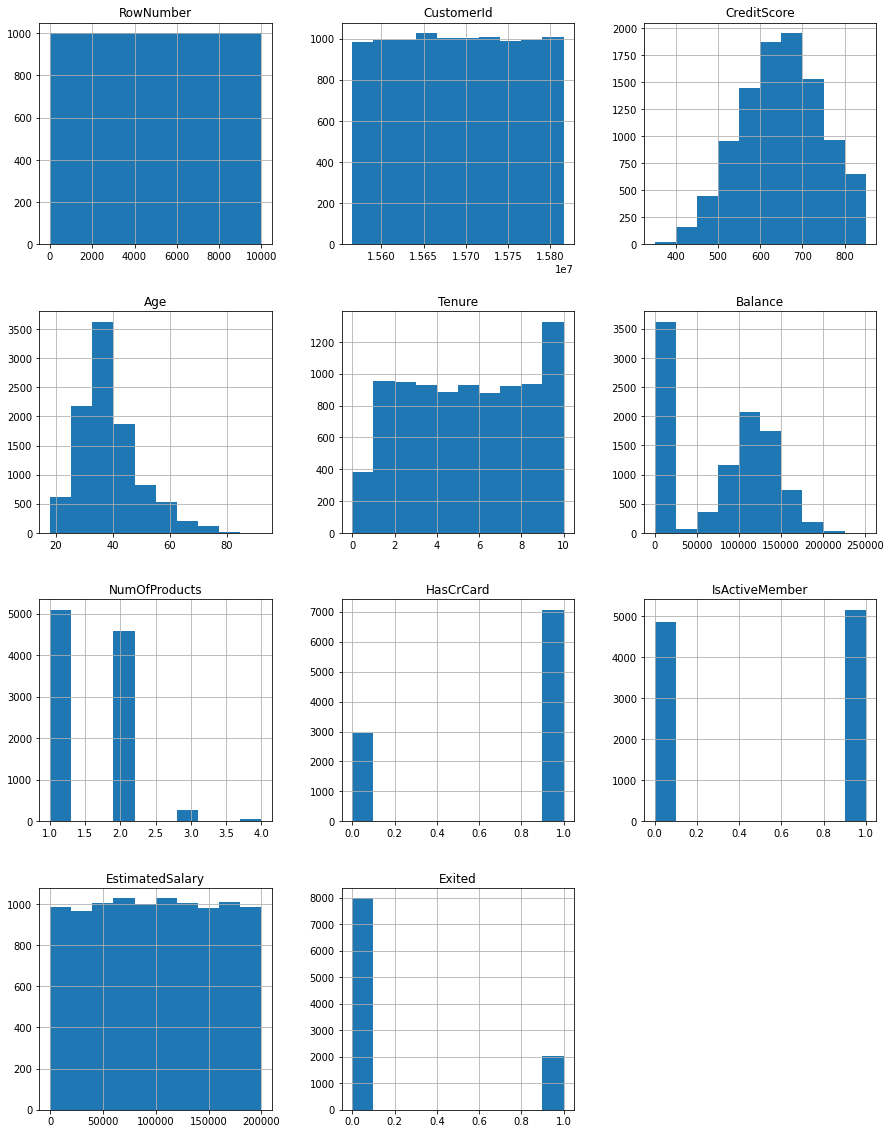

In [5]:
raw_data.hist(figsize=(15, 20));

**Вывод**
- Всего в датасете 10 тыс. строк и 14 столбцов. Из них 3 колонки с признаками типа object.
- Наименования колонок не соответствуют "змеиному" стилю.
- Названия колонок соответствуют документации.
- Пропущенные значения имеются в столбе ``Tenure — сколько лет человек является клиентом банка.``
- Столбец ``Tenure`` хранятся с типом float64


### Предобработка данных

Перед началом, создадим копию данных и присвоим название "data"

In [6]:
data=raw_data.copy()

Переименуем колонки, приведем к нижнему регистру.

In [7]:
data = data.rename(columns={'RowNumber':'row_number', 'CustomerId':'customer_id', 'Surname':'surname',
                            'CreditScore':'credit_score', 'Geography':'geography','Gender':'gender',
                            'Age':'age', 'Tenure':'tenure', 'Balance':'balance', 'NumOfProducts':'num_of_products',
                            'HasCrCard':'has_cr_card','IsActiveMember':'is_active_member', 
                            'EstimatedSalary':'estimated_salary','Exited':'exited'}) 

In [8]:
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [9]:
print(f'Количество дубликатов -  {data.duplicated().sum()}')

Количество дубликатов -  0


Посмотрим на пропуски

In [10]:
data[data['tenure'].isna()].head(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [11]:
data['tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [12]:
print(f'Количество пропущеных данных в стобце tenure -  {data["tenure"].isna().mean()*100}% от объёма данных')

Количество пропущеных данных в стобце tenure -  9.09% от объёма данных


 Это количество не  превышает 10% от изначального объёма данных. Можно их удалить

In [13]:
data=data.dropna(subset=['tenure'])

В столбце ``tenure`` переведем данные в формат int.

In [14]:
data['tenure'] = pd.array(data['tenure'], dtype=pd.Int64Dtype())
data['tenure'].dtypes

Int64Dtype()

**Вывод**
- Наименования колонок приведены к "змеиному" стилю.
- Данные в столбце ``tenure`` приведены к типу, в соответствии с хранящейся в нем информацией.
- Пропущенные значения удалены.


### Обработки категориальных признаков

In [15]:
data['gender'] = pd.get_dummies(data['gender'], drop_first=True)
data= pd.get_dummies (data, columns=['geography'], drop_first=True)

In [16]:
data

,row_number,customer_id,surname,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,0,29,2,0.00,2,0,0,167773.55,0,0,0
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,0,0


**Вывод**
- Столбцы ``tenure``, ``gender`` обработаны методом OHE (приведены к числу).
- Значения в столбце ``gender``: Female (Женский) - 0, Male (Мужской) - 1

### Разобьем данные на выборки

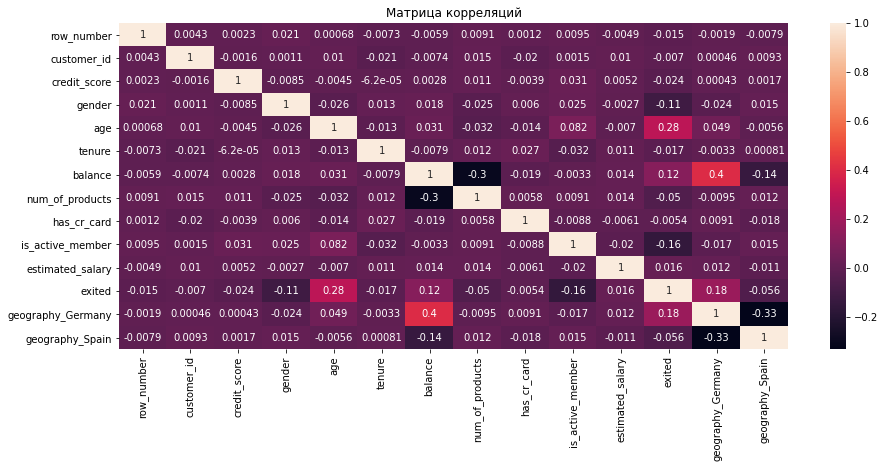

In [17]:
plt.figure(figsize=(15, 6))
plt.title('Матрица корреляций')
sns.heatmap(data.corr(), annot = True)
plt.show()

- Параметр ``exited`` слабо коррелирует с остальными параметрами.
- Больше всего коррелирует параметр   ``exited``с ``age``, но всего на 0,28. Возраста сильнее всего влияет на уход клиента из банка.

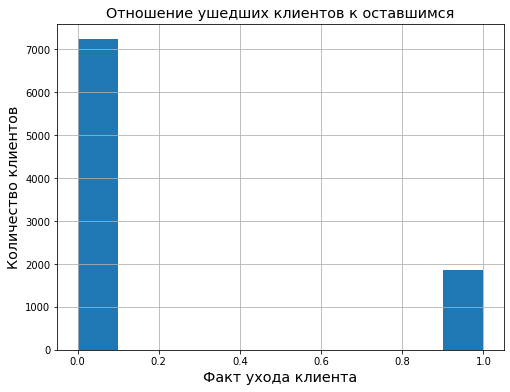

In [18]:
plt.figure()
data['exited'].hist(figsize=(8,6))
plt.title('Отношение ушедших клиентов к оставшимся', fontsize='x-large')
plt.xlabel('Факт ухода клиента', fontsize='x-large')
plt.ylabel('Количество клиентов', fontsize='x-large')
plt.show()

In [19]:
print('Доля ушедших клиентов : {:.0f}% от общего числа клиентов банка'.format(sum(data['exited'])/len(data['exited'])*100) )

Доля ушедших клиентов : 20% от общего числа клиентов банка


Для выборки с признаками отбросим столбцы, которые никак не связаны с расчетом модели машинного обучения:

- ``row_number`` — индекс строки в данных
- ``customer_id`` — уникальный идентификатор клиента
- ``surname`` — фамилия

In [20]:
target = data['exited']
features = data.drop(['exited','row_number', 'customer_id', 'surname'], axis=1)

In [21]:
features_train, features_valid, target_train, target_valid, = train_test_split(
    features, target, test_size=0.40, random_state=12345)# отделим 60% данных для обучающей выборки
features_valid, features_test, target_valid,target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=12345)# разделим поровну (по 20% от данных) для валидационной и тестовой выборки

**Вывод** - Исходный датасет разделен на обучающую, валидационную и тестовую выборки:

In [22]:
print('размер обучающей выборки:',features_train.shape)
print('размер валидационной выборки:',features_valid.shape)
print('размер тестовой выборки:',features_test.shape)

размер обучающей выборки: (5454, 11)
размер валидационной выборки: (1818, 11)
размер тестовой выборки: (1819, 11)


### Стандартизация данных

In [23]:
features_train.describe().astype('int').T 

,count,mean,std,min,25%,50%,75%,max
credit_score,5454,648,96,350,582,650,716,850
gender,5454,0,0,0,0,1,1,1
age,5454,39,10,18,32,37,44,92
tenure,5454,4,2,0,2,5,7,10
balance,5454,76640,61921,0,0,97380,127260,238387
num_of_products,5454,1,0,1,1,1,2,4
has_cr_card,5454,0,0,0,0,1,1,1
is_active_member,5454,0,0,0,0,1,1,1
estimated_salary,5454,100300,58093,11,50812,99953,150633,199953
geography_Germany,5454,0,0,0,0,0,1,1


Исходные признаки имеют разный масштаб.Стандартизируем признаки - ``credit_score``, ``age``, ``tenure``, ``balance``, ``estimated_salary``.

In [24]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


посмотрим уже после стандартизации

In [25]:
features_train.describe().astype('int').T 

,count,mean,std,min,25%,50%,75%,max
credit_score,5454,0,1,-3,0,0,0,2
gender,5454,0,0,0,0,1,1,1
age,5454,0,1,-1,0,0,0,4
tenure,5454,0,1,-1,-1,0,0,1
balance,5454,0,1,-1,-1,0,0,2
num_of_products,5454,1,0,1,1,1,2,4
has_cr_card,5454,0,0,0,0,1,1,1
is_active_member,5454,0,0,0,0,1,1,1
estimated_salary,5454,0,1,-1,0,0,0,1
geography_Germany,5454,0,0,0,0,0,1,1


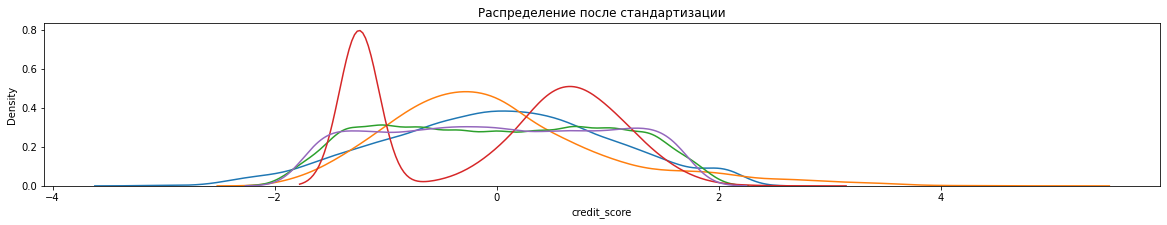

In [26]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (20, 3))
ax1.set_title('Распределение после стандартизации')

sns.kdeplot(features_train['credit_score'], ax = ax1)
sns.kdeplot(features_train[ 'age'], ax = ax1)
sns.kdeplot(features_train['tenure'], ax = ax1)
sns.kdeplot(features_train['balance'], ax = ax1)
sns.kdeplot(features_train['estimated_salary'], ax = ax1)

plt.show()

**Вывод** - Проведена стандартизация признаков

**ВЫВОД**
- Данные предобратоны, удалены пропущенные значения
- Категориальные признаки ``tenure``, ``gender`` обработаны методом OHE (приведены к числу).
- Проведена стандартизации данных 
- Исходный данные разделены на обучающую, валидационную и тестовую выборки.
- Классы не сбалансированы. Соотношение классов целевого признака 1 к 4.


Приступим к исследованию моделей машинного обучения:

## Исследование задачи

создадим функцию для метрик

In [27]:
def metric(target_valid, predicted):
    print('Accuracy для решающего дерева: {:.4f}'.format(accuracy_score(target_valid, predicted)))
    print('Recall(Полнота): {:.4f}'.format(recall_score(target_valid, predicted)))
    print('Precision(Точность): {:.4f}'.format(precision_score(target_valid, predicted)))
    print('F1-мера: {:.4f}'.format(f1_score (target_valid,predicted)))

- Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. Когда значение близко к 0 — модель надо перепроверить и починить. 
- Чем больше отрицательных, тем ниже точность. Нам нужна точность, близкая к единице.
- F1-мера (англ. F1-score). Это среднее гармоническое полноты и точности. F1 означает отношение полноты и точности . 

создадим функцию для матрицы ошибок

In [28]:
def Matrix(target_valid, predicted):  
    disp = ConfusionMatrixDisplay(confusion_matrix(target_valid, predicted))
    disp.plot()   
    plt.xlabel('Предсказания')
    plt.ylabel('Ответы')
    plt.title('Матрица ошибок')
    plt.show()

создадим функцию которая выводит значение AUC-ROC и ROC-кривую

In [29]:
def figure_roc_auc(model, features_valid, target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print('Площадь под кривой ROC: {:.4f}'.format(roc_auc_score(target_valid, probabilities_one_valid)))
    
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

### DecisionTreeClassifier модель для классификации деревом решений

In [30]:
depth_tree = 0
f1_tree = 0
sample_tree = 0
leaf_tree = 0 

for depth in range(2, 20):
    for sample in range(2, 100, 10):       
        for leaf in range(1, 10):
            model = DecisionTreeClassifier(random_state=12345,
                                           max_depth=depth,
                                           min_samples_split = sample,
                                           min_samples_leaf=leaf)
            model.fit(features_train, target_train)
            predictions_tree = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions_tree)
            if f1 > f1_tree:
                depth_tree = depth
                f1_tree = f1
                sample_tree = sample
                leaf_tree = leaf

In [31]:
print(f'Лучший результат у модели при параметрах: "max_depth" {depth_tree},"min_samples_split"= {sample_tree}, "min_samples_leaf"={leaf_tree}' )

Лучший результат у модели при параметрах: "max_depth" 7,"min_samples_split"= 82, "min_samples_leaf"=5


In [32]:
model_tree = DecisionTreeClassifier(random_state=12345,
                                           max_depth=depth_tree,
                                           min_samples_split = sample_tree,
                                           min_samples_leaf=leaf_tree)
model_tree.fit(features_train, target_train)
predicted_tree = model.predict(features_valid)


In [33]:
metric( target_valid, predicted_tree)

Accuracy для решающего дерева: 0.8575
Recall(Полнота): 0.4775
Precision(Точность): 0.7438
F1-мера: 0.5816


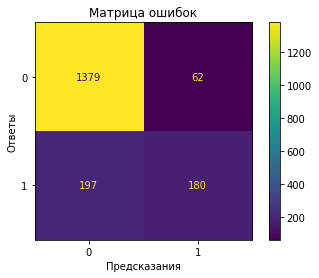

In [34]:
Matrix(target_valid, predicted_tree)

Площадь под кривой ROC: 0.8532


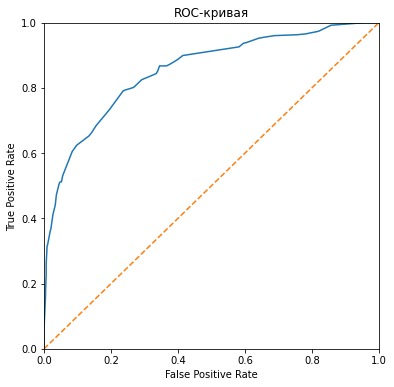

In [35]:
figure_roc_auc(model_tree, features_valid, target_valid)

**Вывод**
- Гиперпараметры лучшей модели дерева решений - 'max_depth'= 7, 'min_samples_leaf'= 5, 'min_samples_split'= 82
- AUC-ROC -0.8532
- Количество правильно предсказанных фактов ухода клиента 1559
- Количество не правильно предсказанных фактов ухода клиента 259
- Accuracy для решающего дерева: 0.8575
- Recall(Полнота): 0.4775
- Precision(Точность): 0.7438
- F1-мера лучшей модели дерева решений - 0.5816

### RandomForestClassifier модель для классификации алгоритмом случайного леса

In [36]:
depth_random = 0
f1_random = 0
n_est_random = 0
split_random = 0

for depth in range(1,21,2):
    for sample in range(2, 11, 2):       
        for est in range(50, 100, 10):
            model = RandomForestClassifier(random_state=12345,
                                           max_depth=depth,
                                           min_samples_split = sample,
                                           n_estimators=est)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            if f1 > f1_random:
                depth_random = depth
                f1_random = f1
                split_random = sample
                n_est_random = est

In [37]:
print(f'Лучший результат у модели при параметрах: "max_depth" {depth_random},"min_samples_split"= {split_random}, "n_estimators"={n_est_random}' )

Лучший результат у модели при параметрах: "max_depth" 15,"min_samples_split"= 6, "n_estimators"=70


In [38]:
model_random = RandomForestClassifier(random_state=12345,
                                           max_depth=depth_random,
                                           min_samples_split = split_random,
                                          n_estimators=n_est_random)
model_random.fit(features_train, target_train)
predicted_random = model.predict(features_valid)


In [39]:
metric(target_valid, predicted_random)

Accuracy для решающего дерева: 0.8586
Recall(Полнота): 0.4483
Precision(Точность): 0.7752
F1-мера: 0.5681


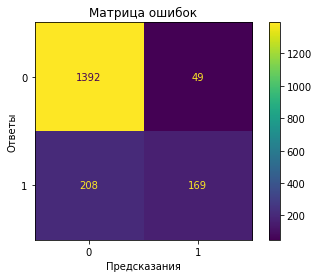

In [40]:
Matrix(target_valid, predicted_random)

Площадь под кривой ROC: 0.8647


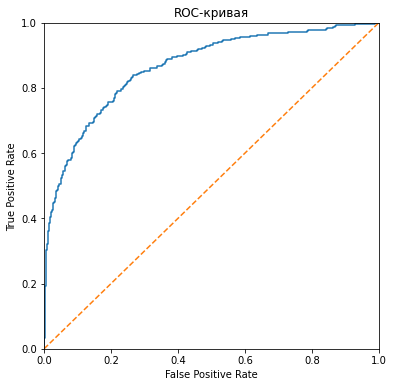

In [41]:
figure_roc_auc(model_random, features_valid, target_valid)

**Вывод**
- Гиперпараметры лучшей модели случайного леса - `max_depth`= 15, `min_samples_split`= 6, `n_estimators`= 80
- AUC-ROC -0.8647
- Количество правильно предсказанных фактов ухода клиента 1561
- Количество не правильно предсказанных фактов ухода клиента 257
- Accuracy для решающего дерева: 0.8586
- Recall(Полнота): 0.4483
- Precision(Точность): 0.7752
- F1-мера лучшей модели дерева решений - 0.5681 

### Модель LogisticRegression - логистическая регрессия

In [42]:
iter_log = 0
f1_log = 0

for i in [20, 50, 100, 200, 500, 1000]:
    model_log = LogisticRegression(random_state=12345, solver='liblinear', max_iter=i)
    model_log.fit(features_train, target_train)
    predicted_log = model_log.predict(features_valid)
    f1 = f1_score(target_valid, predicted_log)
    if f1 > f1_log:
        f1_random = f1
        iter_log = i

In [43]:
print(f'Лучший результат у модели при параметрах: "max_iter"= {iter_log}' )

Лучший результат у модели при параметрах: "max_iter"= 1000


In [44]:
model_log = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iter_log)
model_log.fit(features_train, target_train)
predicted_log = model_log.predict(features_valid)


In [45]:
metric(target_valid, predicted_log)

Accuracy для решающего дерева: 0.8086
Recall(Полнота): 0.2016
Precision(Точность): 0.6179
F1-мера: 0.3040


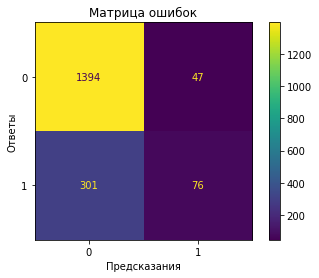

In [46]:
Matrix(target_valid, predicted_log)

Площадь под кривой ROC: 0.7735


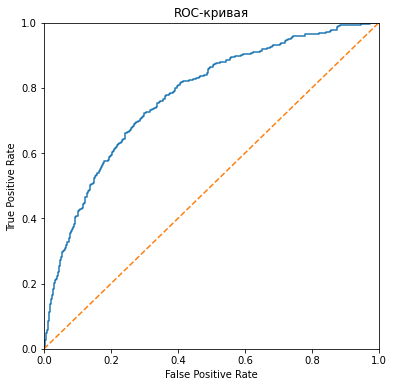

In [47]:
figure_roc_auc(model_log, features_valid, target_valid)

**Вывод**
- Гиперпараметры лучшей модели логистической регрессия  - 'max_iter'= 1000, 'solver'= 'liblinear'
- AUC-ROC -0.7735
- Количество правильно предсказанных фактов ухода клиента 1470
- Количество не правильно предсказанных фактов ухода клиента 348
- Accuracy для решающего дерева: 0.8086
- Recall(Полнота): 0.2016
- Precision(Точность): 0.6179
- F1-мера: 0.3040

Посмотрим на метрики всех моделей

In [48]:
models = ['tree', 'forest', 'log_reg']
accuracy =[accuracy_score(target_valid, predicted_tree),accuracy_score(target_valid, predicted_random),
          accuracy_score(target_valid, predicted_log)]
recall=[recall_score(target_valid, predicted_tree),recall_score(target_valid, predicted_random),
          recall_score(target_valid, predicted_log)]
precision=[precision_score(target_valid, predicted_tree),precision_score(target_valid, predicted_random),
          precision_score(target_valid, predicted_log)]
f1_scores = [f1_score(target_valid, predicted_tree),f1_score(target_valid, predicted_random),
          f1_score(target_valid, predicted_log)]


best_param_model = pd.DataFrame({'модель':models, 'recall':recall,'precision':precision, 'f1_score':f1_scores, })
best_param_model.sort_values(by='f1_score', ascending=False)


,модель,recall,precision,f1_score
0,tree,0.477454,0.743802,0.581583
1,forest,0.448276,0.775229,0.568067
2,log_reg,0.201592,0.617886,0.304000


**ВЫВОД**

F1-мера ни у одной из моделей не достигла рубежа  0.59. Необходимо улучшить качество моделей, учитывая дисбаланс классов. 

## Борьба с дисбалансом

Разделить обучающую выборку на отрицательные и положительные объекты

In [49]:
features_zeros = features_train[target_train == 0] 
features_ones = features_train[target_train == 1] 
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]


print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4328, 11)
(1126, 11)
(4328,)
(1126,)


Чтобы увеличить качество модели при дисбалансе классов, можно воспользоваться техниками: 
- взвешивание классов 
- upsampling 
- downsampling

создадим функцию для техники upsampling

In [50]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


создадим функцию для техники downsampling

In [51]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

### DecisionTreeClassifier

Воспользуемся техникой взвешивание классов.
Придадим объектам редкого класса больший вес.

In [52]:
model_tree_bal= DecisionTreeClassifier(random_state=12345,max_depth=7, 
                                       min_samples_leaf= 5, min_samples_split= 82, class_weight='balanced')
model_tree_bal.fit(features_train, target_train) 

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       min_samples_split=82, random_state=12345)

In [53]:
predicted_tree_bal=model_tree_bal.predict(features_valid)
metric(target_valid, predicted_tree_bal)

Accuracy для решающего дерева: 0.7332
Recall(Полнота): 0.8011
Precision(Точность): 0.4242
F1-мера: 0.5546


Площадь под кривой ROC: 0.8361


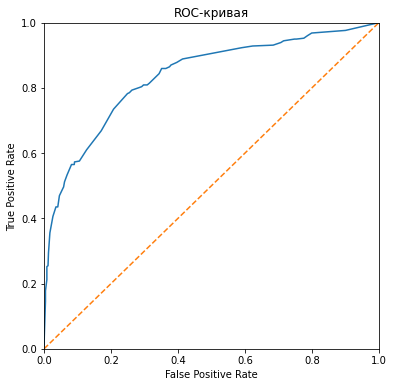

In [54]:
figure_roc_auc(model_tree_bal, features_valid, target_valid)

Используем технику upsampling

In [55]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [56]:
model_tree_up = DecisionTreeClassifier(random_state=12345,max_depth=7, 
                                       min_samples_leaf= 5, min_samples_split= 82)
model_tree_up.fit(features_upsampled, target_upsampled)
predicted_tree_up = model_tree_up.predict(features_valid)
metric(target_valid, predicted_tree_up)

Accuracy для решающего дерева: 0.7393
Recall(Полнота): 0.7851
Precision(Точность): 0.4296
F1-мера: 0.5553


Площадь под кривой ROC: 0.8335


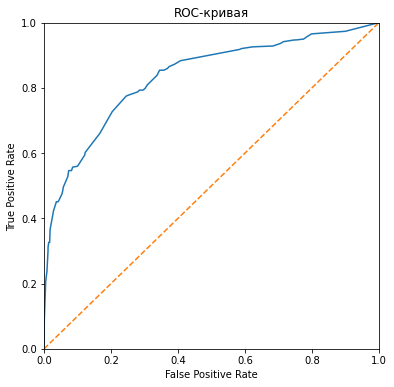

In [57]:
figure_roc_auc(model_tree_up, features_valid, target_valid)

Используем технику downsampling

In [58]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [59]:
model_tree_down = DecisionTreeClassifier(random_state=12345,max_depth=7, 
                                       min_samples_leaf= 5, min_samples_split= 82)
model_tree_down.fit(features_downsampled, target_downsampled)
predicted_tree_down = model_tree_down.predict(features_valid)
metric(target_valid, predicted_tree_down)

Accuracy для решающего дерева: 0.7431
Recall(Полнота): 0.8196
Precision(Точность): 0.4364
F1-мера: 0.5696


Площадь под кривой ROC: 0.8416


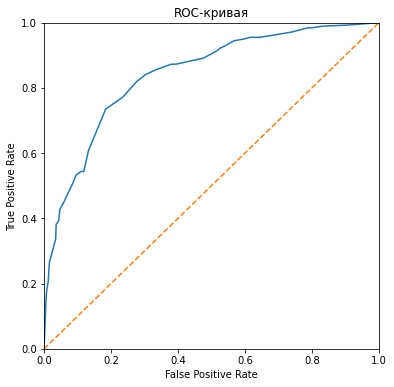

In [60]:
figure_roc_auc(model_tree_down, features_valid, target_valid)

**Лучшее качество модели дерева решений показало с техникой downsampling:**
- Accuracy для решающего дерева: 0.7431
- Recall(Полнота): 0.8196
- Precision(Точность): 0.4364
- ROC: 0.8416
- F1-мера: 0.5696 - не перешагнула порог 0,59.

### RandomForestClassifier 

Воспользуемся техникой взвешивание классов.

In [61]:
model_random_bal=RandomForestClassifier(random_state=12345,max_depth= 15, 
                                        min_samples_split= 6,n_estimators= 70, class_weight='balanced')
model_random_bal.fit(features_train, target_train) 

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=6, n_estimators=70,
                       random_state=12345)

In [62]:
predicted_random_bal=model_random_bal.predict(features_valid)

In [63]:
metric(target_valid, predicted_random_bal)

Accuracy для решающего дерева: 0.8625
Recall(Полнота): 0.5517
Precision(Точность): 0.7197
F1-мера: 0.6246


Площадь под кривой ROC: 0.8701


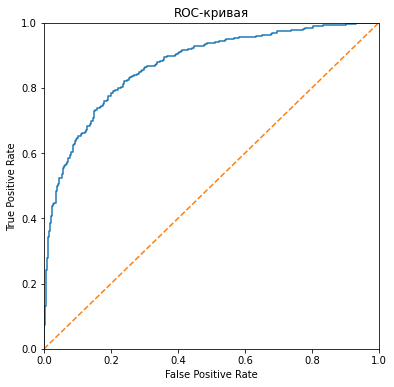

In [64]:
figure_roc_auc(model_random_bal, features_valid, target_valid)

Используем технику upsampling

In [65]:
model_random_up=RandomForestClassifier(random_state=12345,max_depth= 15, 
                                        min_samples_split= 6,n_estimators= 70)
model_random_up.fit(features_upsampled, target_upsampled) 
predicted_random_up=model_random_up.predict(features_valid)
metric(target_valid, predicted_random_up)

Accuracy для решающего дерева: 0.8520
Recall(Полнота): 0.6180
Precision(Точность): 0.6508
F1-мера: 0.6340


Площадь под кривой ROC: 0.8632


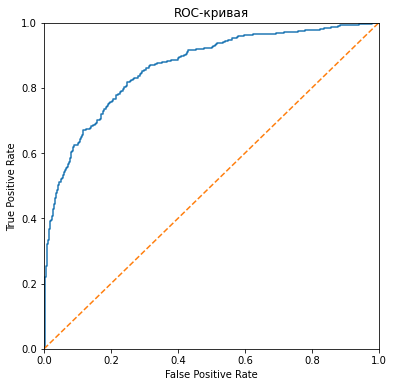

In [66]:
figure_roc_auc(model_random_up, features_valid, target_valid)

Используем технику downsampling

In [67]:
model_random_down=RandomForestClassifier(random_state=12345,max_depth= 15, 
                                        min_samples_split= 7,n_estimators= 80)
model_random_down.fit(features_downsampled, target_downsampled) 
predicted_random_down=model_random_down.predict(features_valid)
metric(target_valid, predicted_random_down)

Accuracy для решающего дерева: 0.7706
Recall(Полнота): 0.7958
Precision(Точность): 0.4688
F1-мера: 0.5900


Площадь под кривой ROC: 0.8657


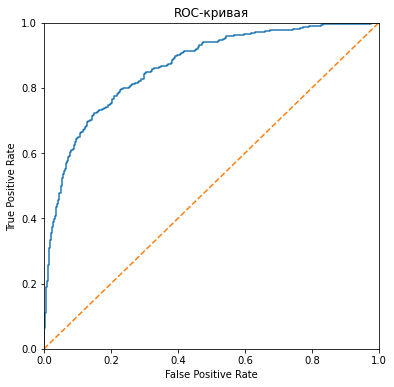

In [68]:
figure_roc_auc(model_random_down, features_valid, target_valid)

**Лучшее качество модели случайного леса показало с техникой upsampling:**

- Accuracy для решающего дерева: 0.8520
- Recall(Полнота): 0.6180
- Precision(Точность): 0.6508
- ROC: 0.8632
- F1-мера: 0.6340 -порог в 0,59 преодолен


### Модель LogisticRegression

Воспользуемся техникой взвешивание классов. 

In [69]:
model_log_bal= LogisticRegression(random_state=12345, solver='liblinear',max_iter= 1000, class_weight='balanced')
model_log_bal.fit(features_train, target_train)
predicted_log_bal = model_log_bal.predict(features_valid)

In [70]:
metric(target_valid, predicted_log_bal)

Accuracy для решающего дерева: 0.7090
Recall(Полнота): 0.7294
Precision(Точность): 0.3917
F1-мера: 0.5097


Площадь под кривой ROC: 0.7778


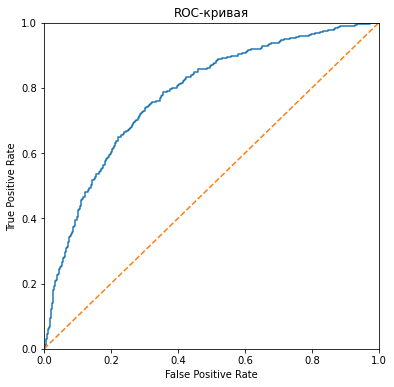

In [71]:
figure_roc_auc(model_log_bal, features_valid, target_valid)

Используем технику upsampling

In [72]:
model_log_up = LogisticRegression(random_state=12345,max_iter= 1000, solver='liblinear')
model_log_up.fit(features_upsampled, target_upsampled)
predicted_log_up = model_log_up.predict(features_valid)
metric(target_valid, predicted_log_up)

Accuracy для решающего дерева: 0.7013
Recall(Полнота): 0.7454
Precision(Точность): 0.3860
F1-мера: 0.5086


Площадь под кривой ROC: 0.7779


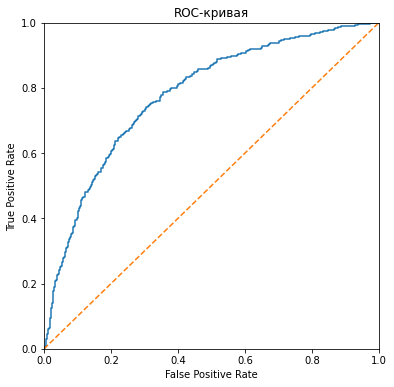

In [73]:
figure_roc_auc(model_log_up, features_valid, target_valid)

Используем технику downsampling

In [74]:
model_log_down = LogisticRegression(random_state=12345,max_iter= 1000, solver='liblinear')
model_log_down.fit(features_downsampled, target_downsampled)
predicted_log_down = model_log_down.predict(features_valid)
metric(target_valid, predicted_log_down)

Accuracy для решающего дерева: 0.6964
Recall(Полнота): 0.7480
Precision(Точность): 0.3816
F1-мера: 0.5054


Площадь под кривой ROC: 0.7772


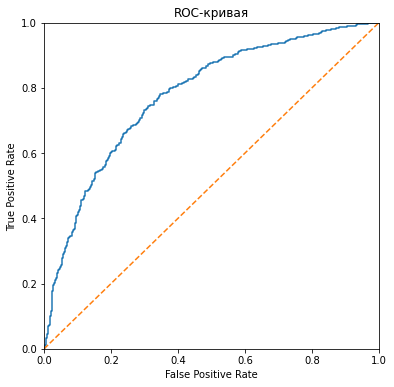

In [75]:
figure_roc_auc(model_log_down, features_valid, target_valid)

**Лучшее качество модели логистической регрессия показало с техникой взвешивание классов:**
- Accuracy для решающего дерева: 0.7090
- Recall(Полнота): 0.7294
- Precision(Точность): 0.3917
- ROC: 0.7772
- F1-мера: 0.5097 - не перешагнула порог 0,59.

**ВЫВОД**

- Нам удалось  перешагнуть порог 0,59 у метрика F1-мера
- На валидационной выборке для модели `model_random_up` случаного леса с использованием техники upsampling для сбалансирования выборок- с параметрами `max_depth= 15`, `min_samples_split= 7`,`n_estimators= 80`.мы получили следующие показатели по метрикам:
  - Accuracy для решающего дерева: 0.8520
  - Recall(Полнота): 0.6180
  - Precision(Точность): 0.6508
  - ROC: 0.8632
  - F1-мера: 0.6340 

## Тестирование модели

In [76]:
predicted_random_up_test=model_random_up.predict(features_test)
metric(target_test, predicted_random_up_test)

Accuracy для решающего дерева: 0.8483
Recall(Полнота): 0.5954
Precision(Точность): 0.6093
F1-мера: 0.6023


Площадь под кривой ROC: 0.8471


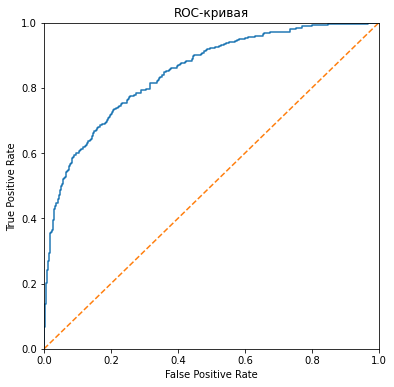

In [77]:
figure_roc_auc(model_random_up, features_test, target_test)

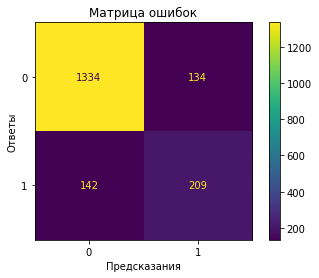

In [78]:
Matrix(target_test, predicted_random_up_test)

In [79]:
from sklearn.metrics import precision_recall_fscore_support
pd.DataFrame(precision_recall_fscore_support(target_test, predicted_random_up_test))

,0,1
0,0.903794,0.609329
1,0.908719,0.595442
2,0.906250,0.602305
3,1468.000000,351.000000


- Доля правильно предсказанных клиентов которые остались '0' среди клиентов, отнесенных моделью к оставшимся '0' составила 90%
- Доля правильно предсказанных клиентов которые ушли '1' - 61%
- Доля истинных клиентов которые остались 0 среди клиентов, отнесенных моделью к оставшимся 0 - 91%
- А у ушедших- всего 60%

Посмотрим какие признаки оказали большее влияние на  построение нашей модели.

In [80]:
importances = model_random_up.feature_importances_
importances_data = pd.DataFrame({'features':list(features_test),
                                 'feature_importances':importances}).sort_values('feature_importances', ascending=False)

importances_data.sort_values('feature_importances', ascending=False)

,features,feature_importances
2,age,0.271067
5,num_of_products,0.147949
4,balance,0.140095
8,estimated_salary,0.125413
0,credit_score,0.120236
3,tenure,0.072099
7,is_active_member,0.037144
9,geography_Germany,0.035037
1,gender,0.022047
6,has_cr_card,0.015485


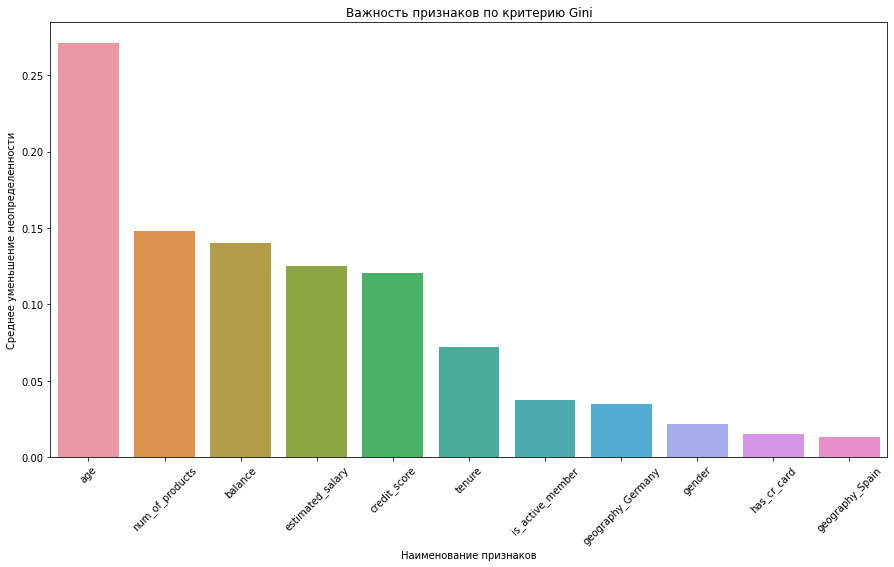

In [81]:
plt.figure(figsize=(15, 8))
sns.barplot(x='features', y="feature_importances",data=importances_data)
plt.xticks(rotation=45)
plt.xlabel('Наименование признаков')
plt.ylabel("Cреднее уменьшение неопределенности")
plt.title('Важность признаков по критерию Gini');

**Вывод**

- При тестировании модели случайного леса, обученной на сбалансированных данных техникой upsampling. F1 мера составила 0.6023. удалось достичь порога метрики F1 выше 0,59.
- Количество правильно предсказанных фактов ухода клиента 1543
- Количество не правильно предсказанных фактов ухода клиента 276
- Accuracy для решающего дерева: 0.8483
- Recall(Полнота): 0.5954
- Precision(Точность): 0.6093
- ROC: 0.8471
- Самые важные признаки в данных: 
  - возраст- оказывает большее влияние,
  - количество продуктов банка, используемых клиентом 
  - баланс.

**ВЫВОД**

**Целью нашего исследования было подобрать модель, предсказывающую уход клиента из банка.**

- Была проведена предобработка данных, удалены пропущенные значения.
- Категориальные признаки приведены к числу.
- Проведена стандартизации данных
- Исходный данные разделены на обучающую, валидационную и тестовую выборки.
- Для борьбы с дисбалансом класса были применены методы взвешивание классов, upsampling и downsampling.
- Было проведено обучение трех моделей:
  - дерева решений - DecisionTreeClassifier,
  - случайного леса - RandomForestClassifier,
  - логистической регрессии - LogisticRegression.
- На валидационной выборке лучший результат F1=0.6360 и AUC_ROC=0.8698 показала модель случайного леса с параметрами: `max_depth= 15`, `min_samples_leaf= 1`, `min_samples_split= 7`,`n_estimators= 80`, `class_weight='balanced'`. 
- На  тестовой выборке данная модель показала результат с F1=0.6135 и AUC_ROC=0.8546. 
- Самые важные признаки в данных:
  - возраст,
  - количество продуктов банка, используемых клиентом
  - баланс.

In [82]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)

0.3235023041474654

In [83]:
pd.DataFrame(precision_recall_fscore_support(target_test, dummy_model.predict(features_test)))

,0,1
0,0.0,0.192963
1,0.0,1.000000
2,0.0,0.323502
3,1468.0,351.000000
